# Module 5 R Exercise

In these exercises, we will use ggplot2 layered approach to create plots similar to the ones in the practice. 

Let's start with the U.S. Census Bureau population projections.

In [2]:
library(ggplot2)
library(RColorBrewer)

pproj = read.csv("../../../datasets/census/pop_proj.csv")
head(pproj)
summary(pproj)


sex,age,year,pop
Female,Under 5 years,2015,9755
Female,5 to 13 years,2015,18047
Female,14 to 17 years,2015,8207
Female,18 to 24 years,2015,15196
Female,25 to 44 years,2015,42098
Female,45 to 64 years,2015,43021


     sex                    age         year           pop       
 Female:28   14 to 17 years   :8   Min.   :2015   Min.   : 8173  
 Male  :28   18 to 24 years   :8   1st Qu.:2019   1st Qu.:10690  
             25 to 44 years   :8   Median :2022   Median :18773  
             45 to 64 years   :8   Mean   :2022   Mean   :24332  
             5 to 13 years    :8   3rd Qu.:2026   3rd Qu.:40819  
             65 years and over:8   Max.   :2030   Max.   :48846  
             Under 5 years    :8                                 

This data set has seven age brackets instead of each and every age. Years show the projection years of the male and female population in U.S. and population is given in 1000s. 

**Exercise 1: ** Create a bar plot to show the age bracket distribution of the total population in year 2015. 

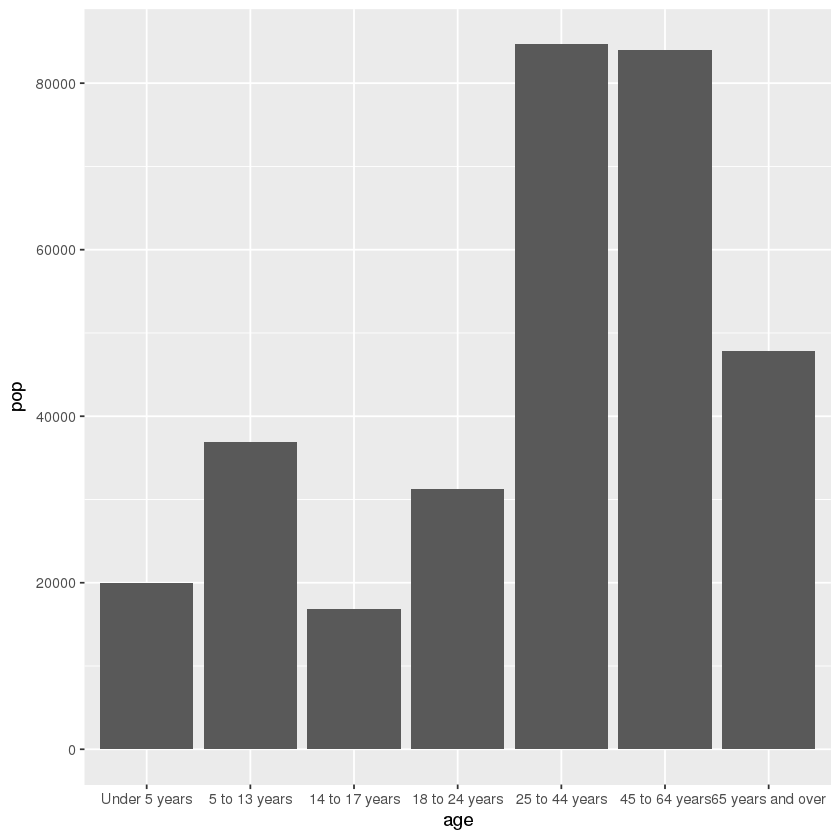

In [3]:
# Remember how to do a bar chart with actual values instead of counts. You should use "identity" statistics. 
ggplot(pproj, aes(x=age,y=pop)) +
geom_bar(data = subset(pproj, year == "2015"), stat="identity") +
# this is to order the x axis 
scale_x_discrete(limits = c("Under 5 years","5 to 13 years","14 to 17 years","18 to 24 years","25 to 44 years", 
                            "45 to 64 years","65 years and over"))

**Exercise 2: ** Create a pie chart for the same data in exercise 1. 

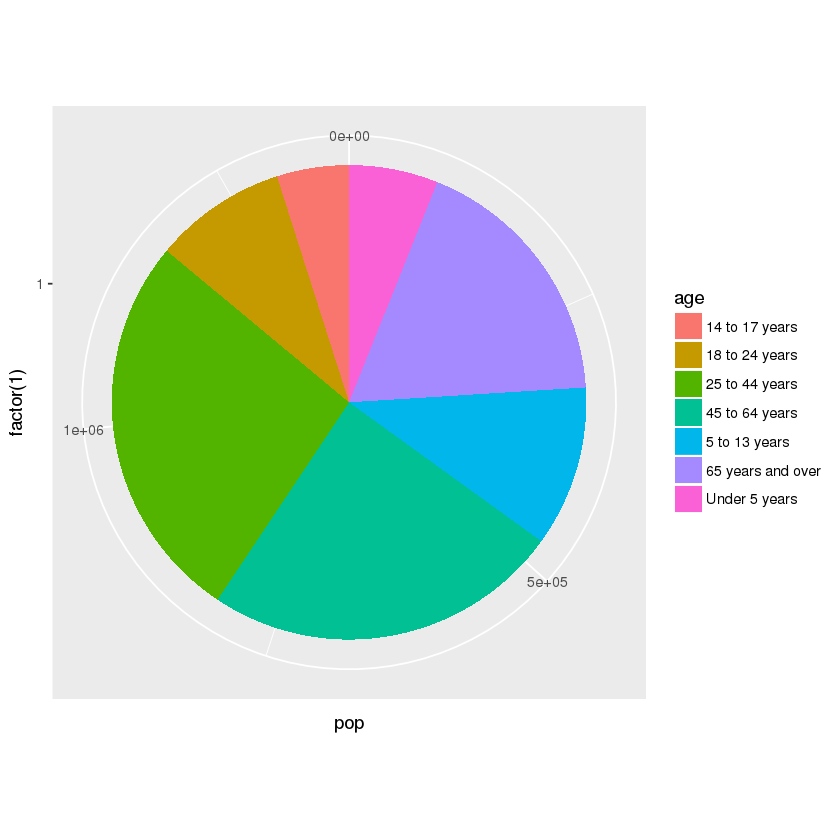

In [8]:
# remember a pie chart really is a STACKED bar chart with a SINGLE (1) bar in a polar coordinate system. 
# use fill to stack a variable's classes in the bar. 
ggplot(pproj, aes(x=factor(1),y=pop,fill=age)) + 
geom_bar(data = subset(pproj,year="2015"), stat="identity", width=1) +
# which coords ? 
coord_polar(theta="y")

**Exercise 3: ** Create a pie chart for similar to above exercise but only for female population. 

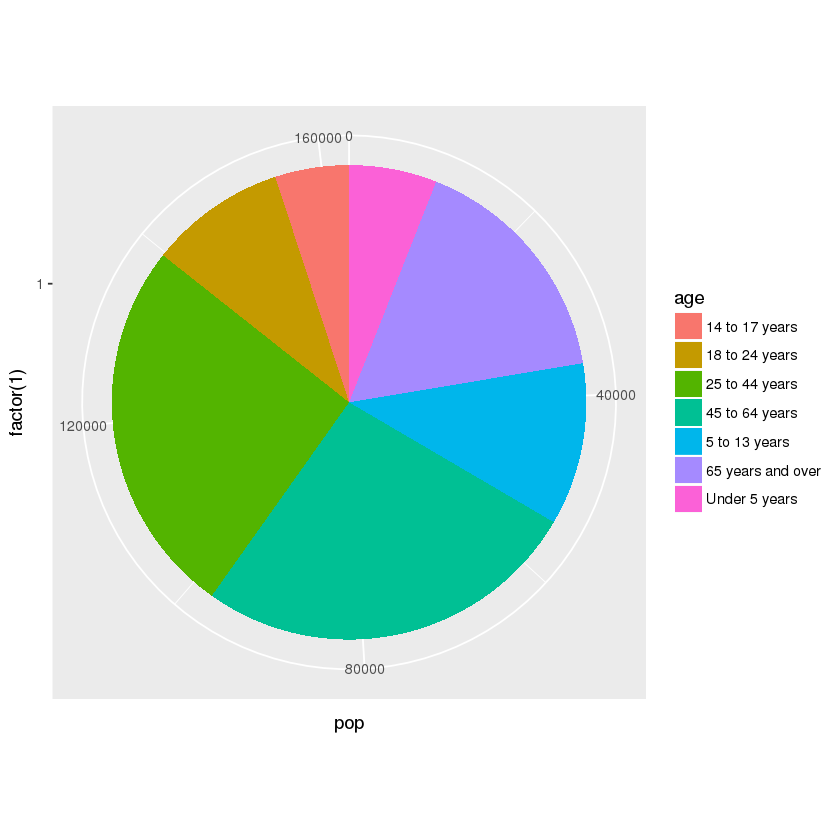

In [10]:
ggplot(pproj, aes(x=factor(1),y=pop,fill=age)) + 
geom_bar(data = subset(pproj,year=='2015'& sex=='Female'), stat="identity", width=1) +
coord_polar(theta="y")

**Exercise 4: ** Create pie charts of all years for total population similar to exercise 2. Use faceting.

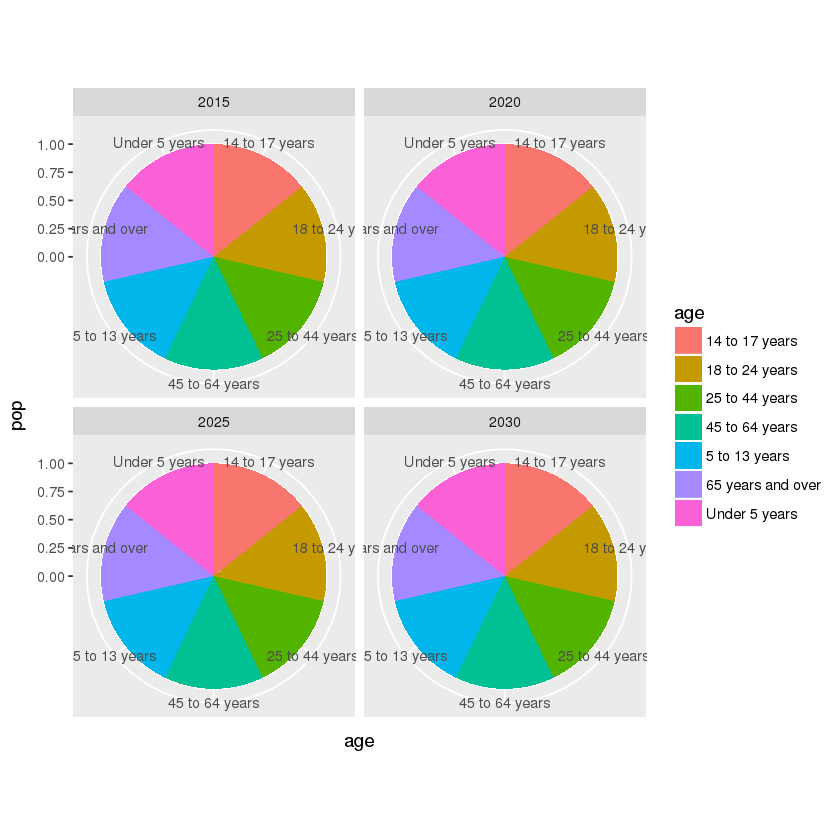

In [12]:
ggplot(pproj, aes(x=age,y=pop,fill=age)) + 
# do not forget to use fill position adjustment, see what happens if you don't. 
geom_bar(stat="identity", width=1, position="fill") +
coord_polar() +
facet_wrap(~year)

**Exercise 5: ** Create a population pyramid for year 2015. 

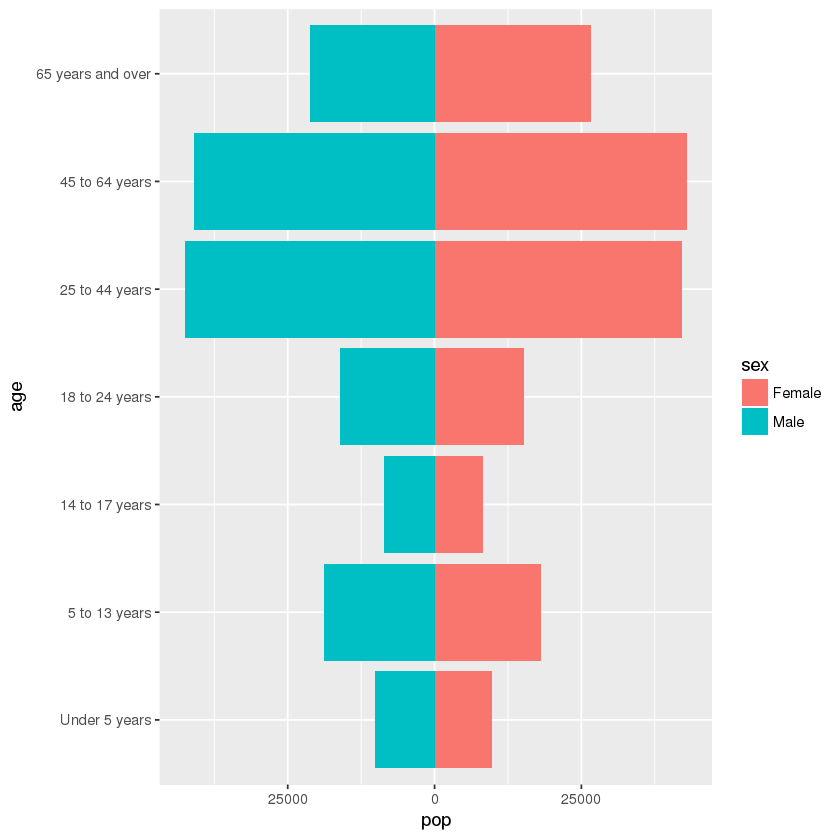

In [13]:
# Look at your practice code and figure out how you could adapt it for this. 
ggplot(pproj, aes(x=age,y=pop,fill=sex)) + 
geom_bar(data=subset(pproj,year=="2015" & sex=="Female" ),stat="identity") +
geom_bar(data=subset(pproj,year=="2015" & sex=="Male"),stat='identity',position='identity',aes(y=-pop)) +
coord_flip() + scale_y_continuous(labels=abs) +
# make sure to have ordered axis
scale_x_discrete(limits = c("Under 5 years","5 to 13 years","14 to 17 years","18 to 24 years","25 to 44 years", 
                            "45 to 64 years","65 years and over"))

**Exercise 6: ** Create four population pyramids for all years. Use faceting.  

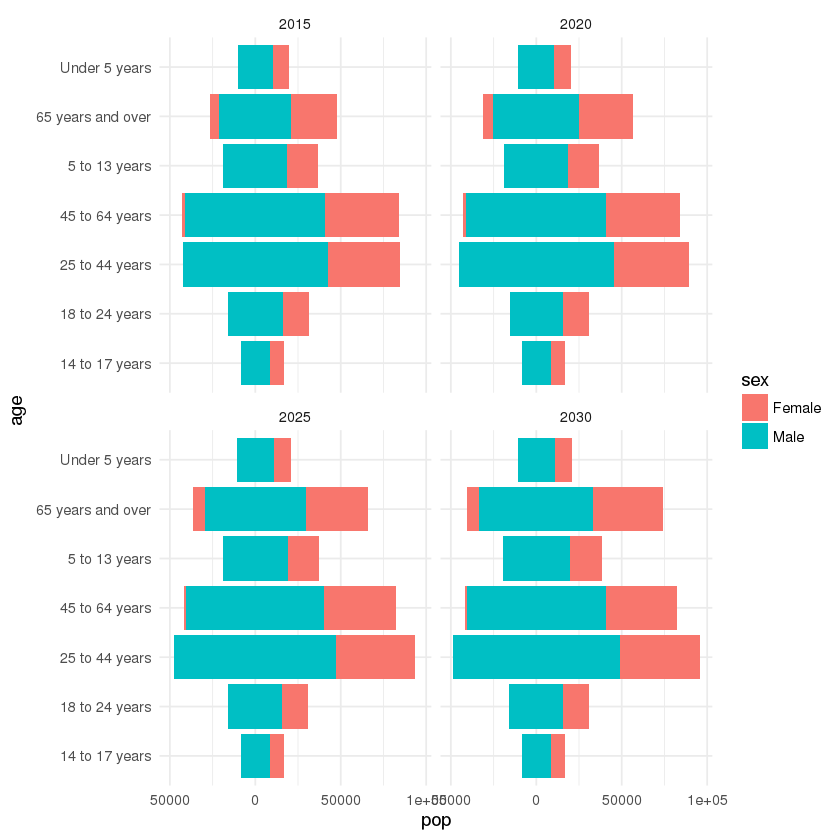

In [14]:
# Look at your practice code and figure out how you could adapt it for this. 
ggplot(pproj,aes(x=age,y=pop,fill=sex)) + 
geom_bar(data=subset(pproj,sex="Male"),stat='identity')+
geom_bar(data=subset(pproj,sex="Female"),stat='identity',position='identity',aes(y=-pop)) +
coord_flip() + theme_minimal()+ scale_y_continuous(labels=abs) + facet_wrap(~year)

**Exercise 7: ** Create a stacked bar chart to show male and female population projections for **all** years. Hint: year will be encoded by the x position.

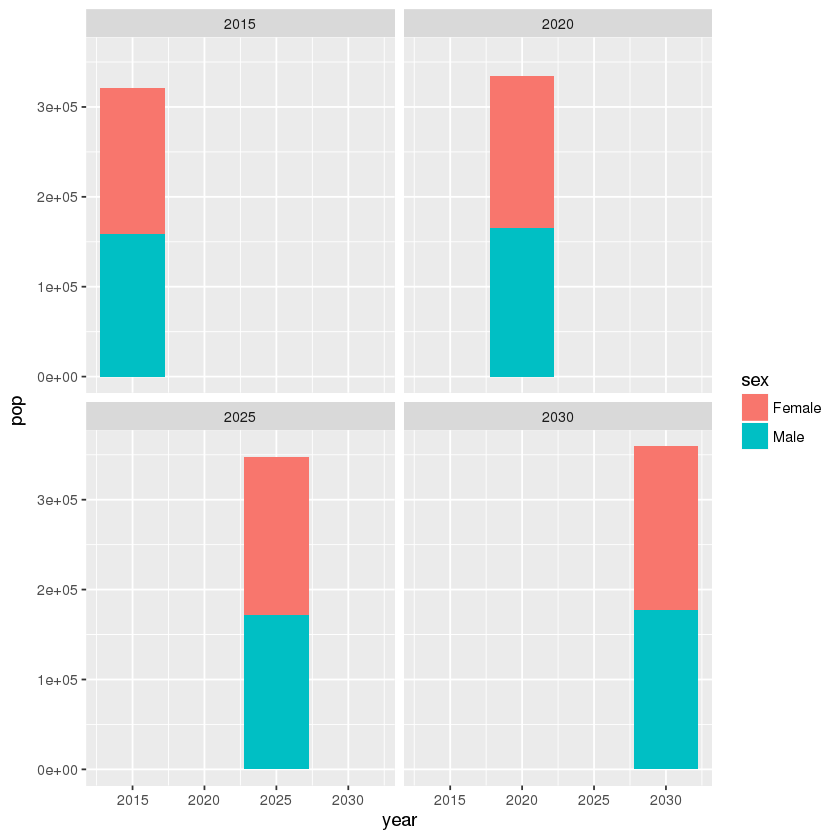

In [18]:
ggplot( pproj,aes(x=year,y=pop,fill=sex))+
geom_bar(stat='identity',position="stack") + facet_wrap(~year)


Now we will read another data set: San Francisco population projections from California Open Data Portal. This data has population projections for each age and ethnicity. 

**Exercise 8: ** Create a **total** population pyramid for year 2015.

In [19]:
sfoproj=read.csv("../../../datasets/census/SFO_pop_pyr.csv")
head(sfoproj)
summary(sfoproj)

Year,Race_code,Race_name,Gender,Age,Population
2010,1,White,Female,0,1579
2010,1,White,Female,1,1358
2010,1,White,Female,2,1212
2010,1,White,Female,3,1083
2010,1,White,Female,4,997
2010,1,White,Female,5,913


      Year        Race_code            Race_name      Gender          Age     
 Min.   :2010   Min.   :1   American Indian :606   Female:2121   Min.   :  0  
 1st Qu.:2010   1st Qu.:2   Asian           :606   Male  :2121   1st Qu.: 25  
 Median :2015   Median :4   Black           :606                 Median : 50  
 Mean   :2015   Mean   :4   Hispanic        :606                 Mean   : 50  
 3rd Qu.:2020   3rd Qu.:6   Multi-Race      :606                 3rd Qu.: 75  
 Max.   :2020   Max.   :7   Pacific Islander:606                 Max.   :100  
                            White           :606                              
   Population    
 Min.   :   0.0  
 1st Qu.:  20.0  
 Median : 207.0  
 Mean   : 600.9  
 3rd Qu.: 862.8  
 Max.   :5079.0  
                 

In [20]:
unique(sfoproj$Year)

[1] 2010 2015 2020

In [27]:
unique(sfoproj$Gender)


[1] Female Male  
Levels: Female Male

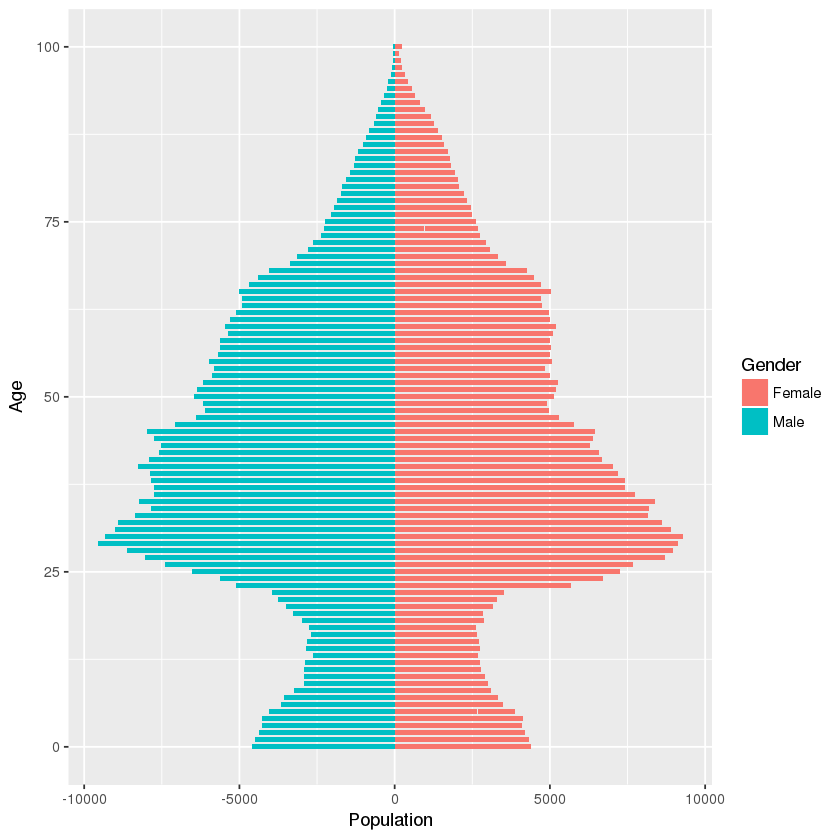

In [21]:
ggplot(sfoproj, aes(x = Age,y = Population,fill=Gender)) + 
geom_bar(data=subset(sfoproj,Year=="2015" & Gender=="Female"),stat='identity',width=0.7) +
geom_bar(data=subset(sfoproj,Year=="2015" & Gender=="Male"),stat='identity',aes(y=-Population), width=0.7) +
coord_flip()

**Exercise 9: ** Create a population pyramid for year 2015, and show ethnicities as stacked bars. Hint: the only thing you have to change is how the bars will be filled. 

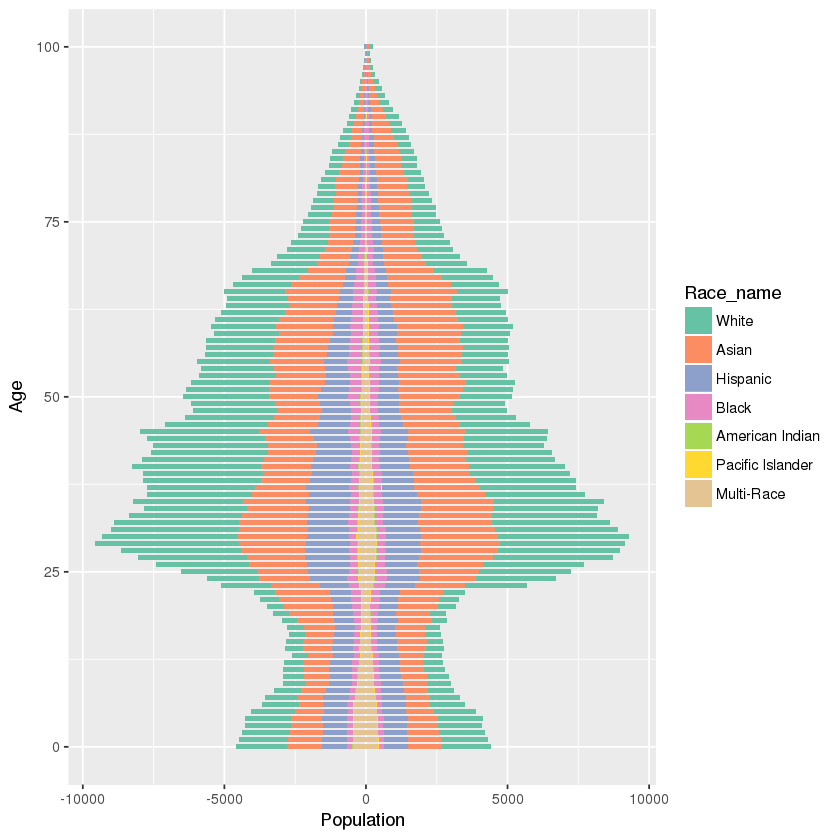

In [22]:
# First we need to create an "ordered" attribute so that both sides 
# of the pyramid are ordered with respect to the order we specify. 
sfoproj <- transform(sfoproj,
       Race_name = ordered(Race_name, levels = c("White","Asian","Hispanic","Black","American Indian","Pacific Islander","Multi-Race")))

# Now do the pyramid here. do NOT use  position = "identity" for the geom_bar 
ggplot(sfoproj, aes(x=Age,y=Population,fill=Race_name)) + 
geom_bar(data=subset(sfoproj,Year=="2015" & Gender == "Female"),stat="identity", width=0.7) +
geom_bar(data=subset(sfoproj,Year=="2015" & Gender =="Male"),stat="identity",aes(y=-Population), width=0.7) +
coord_flip() +  
scale_fill_brewer(palette="Set2")
 

**Exercise 10: ** Create three population pyramids for years 2010, 2015, and 2020, and show ethnicities as stacked bars. Use faceting.

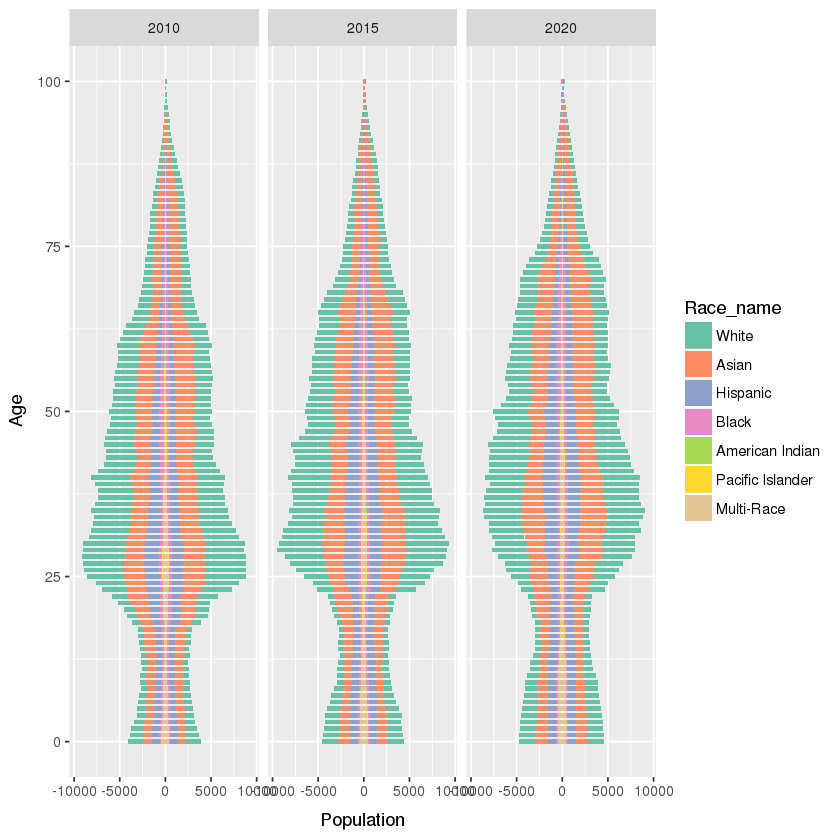

In [25]:
sfoproj<-transform(sfoproj,
Race_name=ordered(Race_name,levels=c("White","Asian","Hispanic","Black","American Indian","Pacific Islander","Multi-Race")))
ggplot(sfoproj,aes(x=Age,y=Population,fill=Race_name)) + 
geom_bar(data=subset(sfoproj,Gender=="Female"),stat="identity",width=0.7) +
geom_bar(data=subset(sfoproj,Gender=="Male"),stat="identity",aes(y=-Population),width=0.7) +
coord_flip() + scale_fill_brewer(palette="Set2")+
facet_wrap(~Year)